# CAB420, Practical 4, Question 3 Template
## Exploring Other Layers

There are many changes or extensions that you could make to the above networks to further explore deep convolutional neural networks. In your own time, try the following:
* Add dropout to one (or both) networks in a few locations. Use ``SpatialDropout2D`` layers after convolution layers, and ``Dropout`` layers after dense layers. With dropout layers in the network, consider:
  * How is the number of iterations required to train the network to convergence impacted by the addition of dropout?
  * Are any differences with respect to overfitting observed?
  * What happens as the dropout probability is increased?
* Add Batch Normalisation to the network in a few locations. With batch normalisation in the network, consider:
  * How is the number of iterations required to train the network to convergence impacted by the addition of batch normalisation?
  * Are any differences with respect to overfitting observed?
  * The placement of batch normalisation. In particular try placing it before and after an activation and see what behaviours are observed.
* Change the ``padding`` type used by the convolutional layers. Observe what happens to the representation size when you change this.
* Change the activation used. Consider using an activation such as Swish, or an ELU, rather than the standard relu (though leave the final activation as a softmax). Train the network with the alternate activation and note any changes.

### Relevant Examples

The DCNN examples from this week, in particular ``CAB420_DCNNs_Example_1_Classification_with_Deep_Learning.ipynb`` is a good starting point and has examples of how to build and train a neural network.

The additional example, ``CAB420_DCNNs_Additional_Example_4_Layer_Order_and_Overfitting.ipynb`` is also worth a look as it shows how to use layers like dropout and batchnorm.

Finally, this question should build directly of your answers to Q1 and Q2 as well.

### Suggested Packages

TensorFlow and Keras are your friends here. Matplotlib and maybe seaborn will be good for plotting, and sklearn also provides some useful functionality for confusion matricies and accuracy metrics.

In [1]:
import os
# why is this here? This is disabling some tensorflow warning I get in some of my environments that 
# annoy me (look ugly and untidy really)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

import keras
from keras import layers
from keras.utils import to_categorical

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

import matplotlib.pyplot as plt
import seaborn as sns

import numpy

## Loading the Data

CIFAR-10 is built into keras, so we can load that directly. Note that we will:
* Convert the y-data to categoricals
* Plot some example images as a sanity check

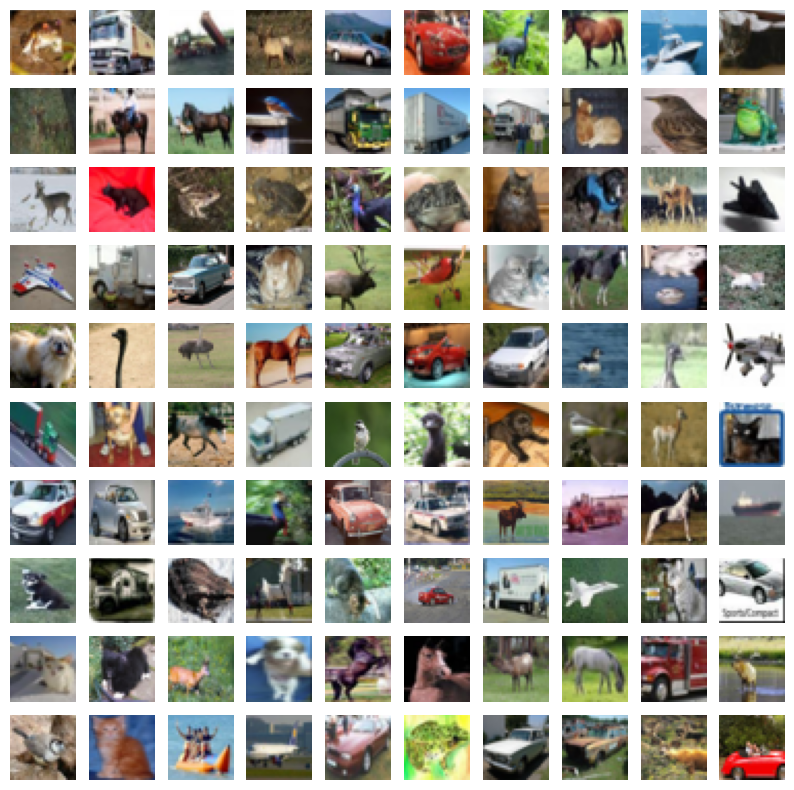

In [2]:
(train, train_y), (test, test_y) = keras.datasets.cifar10.load_data()

train_y = to_categorical(train_y, 10)
test_y = to_categorical(test_y, 10)

fig = plt.figure(figsize=[10, 10])
for i in range(100):
    ax = fig.add_subplot(10, 10, i + 1)
    ax.imshow(train[i,:,:,:])
    ax.axis('off')

## A Baseline

Pick one, or both, of our networks from the previous question. Copy this here to act as your baseline. This is the network that you'll modify, and you can compare the changed versions to what you have here.

In [3]:
### Your VGG-Like and/or AlexNet-Like network goes here
# network input, images are 32 pixels square, and colour; so our size is 32 x 32 x 3
inputs = keras.Input(shape=(32, 32, 3, ), name='img')

# put the rest of the network in here
# first conv group
x = layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same')(inputs)
x = layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same')(x)
x = layers.MaxPool2D(pool_size=(2,2))(x)

# second conv group
x = layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same')(x)
x = layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same')(x)
x = layers.MaxPool2D(pool_size=(2,2))(x)

# third conv group
x = layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same')(x)
x = layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same')(x)
x = layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same')(x)
x = layers.MaxPool2D(pool_size=(2,2))(x)

# dense layers
x = layers.Flatten()(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dense(512, activation='relu')(x)

# the output, 10 neurons for 10 classes, and a softmax activation
outputs = layers.Dense(10, activation='softmax')(x)

# build the model, and print a summary
baseline_model_vgg = keras.Model(inputs=inputs, outputs=outputs, name='vgg_for_cifar10')
baseline_model_vgg.summary()

Model: "vgg_for_cifar10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ img (InputLayer)                │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,751,466 (6.68 MB)

 Trainable params: 1,751,466 (6.68 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
def eval_model(model, train, train_y, test, test_y):
    fig = plt.figure(figsize=[20, 8])    

    ax = fig.add_subplot(1, 2, 1)    
    # predict on the training set
    pred = model.predict(train, verbose=False);
    # get indexes for the predictions and ground truth, this is converting back from a one-hot representation
    # to a single index
    indexes = keras.ops.argmax(pred, axis=1)
    gt_idx = keras.ops.argmax(train_y, axis=1)

    # plot the confusion matrix, I'm using tensorflow and seaborn here, but you could use
    # sklearn as well
    confusion_mtx = confusion_matrix(gt_idx, indexes) 
    sns.heatmap(confusion_mtx, xticklabels=range(10), yticklabels=range(10), 
            annot=True, fmt='g', ax=ax)
    # set the title to the F1 scope
    ax.set_title('Training, F1 Score: %f' % f1_score(gt_idx, indexes, average='weighted'))

    # repeat visualisation for the test set
    ax = fig.add_subplot(1, 2, 2)  
    pred = model.predict(test, verbose=False);
    indexes = keras.ops.argmax(pred, axis=1)
    gt_idx = keras.ops.argmax(test_y, axis=1)

    confusion_mtx = confusion_matrix(gt_idx, indexes) 
    sns.heatmap(confusion_mtx, xticklabels=range(10), yticklabels=range(10), 
            annot=True, fmt='g', ax=ax)
    ax.set_title('Testing, F1 Score: %f' % f1_score(gt_idx, indexes, average='weighted'))
    
### Create a function to train and evaluate your model, and evaluate your baseline model 
def train_and_eval(model, train, train_y, test, test_y):
    
    model.compile(
        # categorical cross entropy loss
        loss='categorical_crossentropy',
        # adam optimiser
        optimizer=keras.optimizers.Adam(),
        # compute the accuracy metric, in addition to the loss 
        metrics=['accuracy'], jit_compile=False)

    # train the model
    # add your batch size and number of epochs here
    history = model.fit(train, train_y, batch_size=256, epochs=50, validation_data=(test, test_y), verbose=True,
                        callbacks=[keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, verbose=0,
                                                                 mode="auto", restore_best_weights=True,
                                                                 start_from_epoch=5)])    

    fig = plt.figure(figsize=[20, 6])
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history['loss'], label="Training Loss")
    ax.plot(history.history['val_loss'], label="Validation Loss")
    ax.legend()

    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history['accuracy'], label="Training Accuracy")
    ax.plot(history.history['val_accuracy'], label="Validation Accuracy")
    ax.legend()
    
    eval_model(model, train, train_y, test, test_y)
    
    return model

Epoch 1/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 21s 71ms/step - accuracy: 0.2509 - loss: 2.6819 - val_accuracy: 0.4992 - val_loss: 1.3951
Epoch 2/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - accuracy: 0.5315 - loss: 1.3067 - val_accuracy: 0.5620 - val_loss: 1.2659
Epoch 3/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - accuracy: 0.6309 - loss: 1.0384 - val_accuracy: 0.6547 - val_loss: 0.9828
Epoch 4/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - accuracy: 0.6918 - loss: 0.8666 - val_accuracy: 0.6705 - val_loss: 0.9371
Epoch 5/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - accuracy: 0.7420 - loss: 0.7323 - val_accuracy: 0.7106 - val_loss: 0.8427
Epoch 6/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - accuracy: 0.7816 - loss: 0.6230 - val_accuracy: 0.6981 - val_loss: 0.8967
Epoch 7/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - accuracy: 0.8138 - loss: 0.5309 - val_accuracy: 0.7220 - val_loss: 0.8619
Epoch 8/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - accuracy: 0.8460 - loss: 0.4388 - val_acc

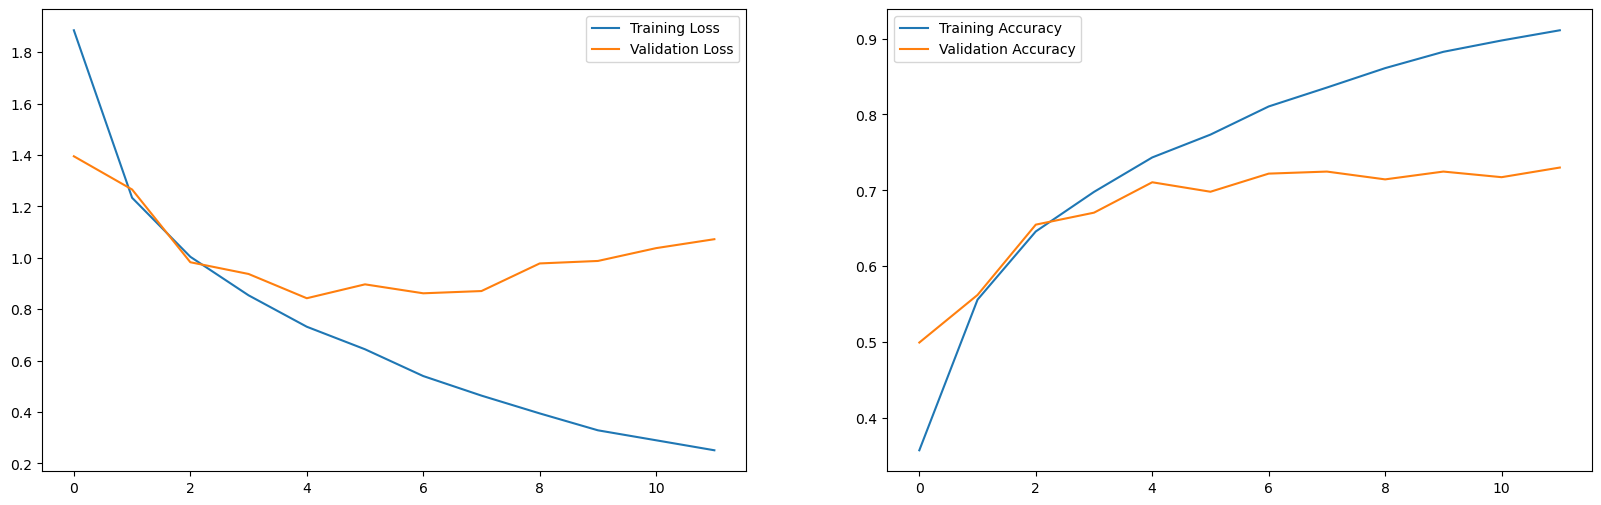

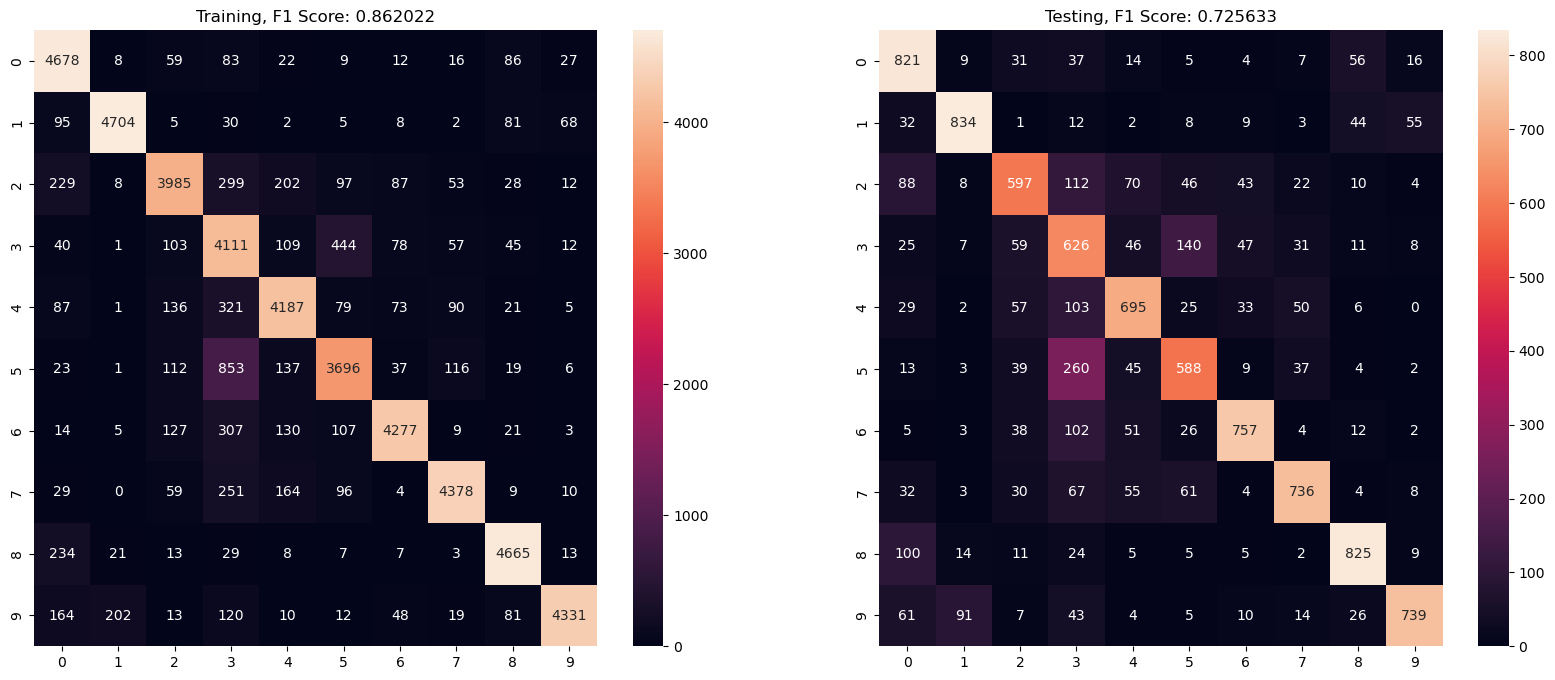

In [5]:
model = train_and_eval(baseline_model_vgg, train, train_y, test, test_y)

### Adding Dropout

Copy your baseline network below, and add dropout. It's recommended to use spatial-dropout after convolutional layer. Experiement with different amounts of dropout.

In [6]:
### Network with dropout goes here, and then evaluate your network

### Your VGG-Like and/or AlexNet-Like network goes here
# network input, images are 32 pixels square, and colour; so our size is 32 x 32 x 3
inputs = keras.Input(shape=(32, 32, 3, ), name='img')

# put the rest of the network in here
# first conv group
x = layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same')(inputs)
x = layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same')(x)
x = layers.SpatialDropout2D(0.25)(x)
x = layers.MaxPool2D(pool_size=(2,2))(x)

# second conv group
x = layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same')(x)
x = layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same')(x)
x = layers.SpatialDropout2D(0.25)(x)
x = layers.MaxPool2D(pool_size=(2,2))(x)

# third conv group
x = layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same')(x)
x = layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same')(x)
x = layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same')(x)
x = layers.SpatialDropout2D(0.25)(x)
x = layers.MaxPool2D(pool_size=(2,2))(x)

# dense layers
x = layers.Flatten()(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.25)(x)

# the output, 10 neurons for 10 classes, and a softmax activation
outputs = layers.Dense(10, activation='softmax')(x)

# build the model, and print a summary
vgg_with_fropout = keras.Model(inputs=inputs, outputs=outputs, name='vgg_for_cifar10')
vgg_with_fropout.summary()

Model: "vgg_for_cifar10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ img (InputLayer)                │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout2d               │ (None, 32, 32, 32)     │             0 │
│ (SpatialDropout2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout2d_1             │ (None, 16, 16, 64)     │             0 │
│ (SpatialDropout2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout2d_2             │ (None, 8, 8, 128)      │             0 │
│ (SpatialDropout2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,751,466 (6.68 MB)

 Trainable params: 1,751,466 (6.68 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 19s 60ms/step - accuracy: 0.1650 - loss: 2.6245 - val_accuracy: 0.4362 - val_loss: 1.5762
Epoch 2/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - accuracy: 0.4182 - loss: 1.6010 - val_accuracy: 0.5206 - val_loss: 1.3404
Epoch 3/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - accuracy: 0.5044 - loss: 1.3756 - val_accuracy: 0.5720 - val_loss: 1.2442
Epoch 4/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - accuracy: 0.5762 - loss: 1.1958 - val_accuracy: 0.6253 - val_loss: 1.0846
Epoch 5/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - accuracy: 0.6183 - loss: 1.0767 - val_accuracy: 0.6632 - val_loss: 0.9861
Epoch 6/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - accuracy: 0.6439 - loss: 1.0019 - val_accuracy: 0.6806 - val_loss: 0.9116
Epoch 7/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - accuracy: 0.6682 - loss: 0.9358 - val_accuracy: 0.7093 - val_loss: 0.8393
Epoch 8/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - accuracy: 0.6951 - loss: 0.8637 - val_acc

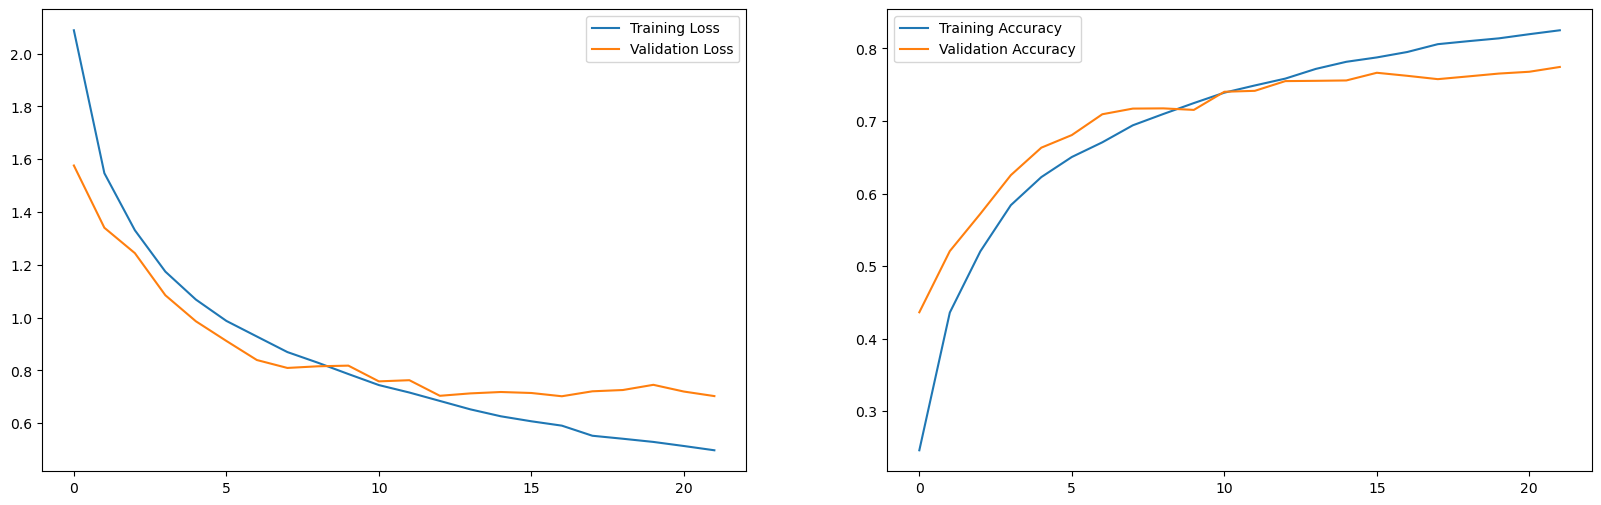

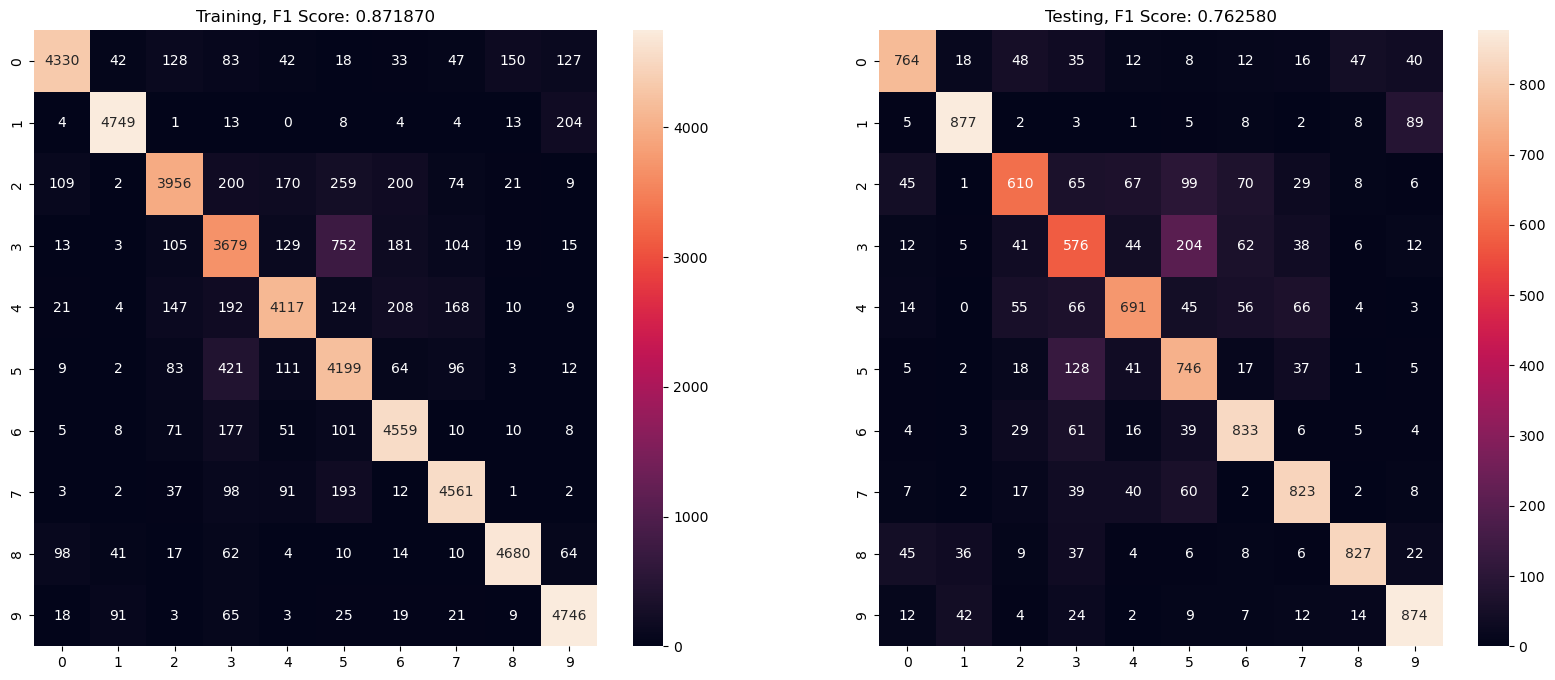

In [7]:
model = train_and_eval(vgg_with_fropout, train, train_y, test, test_y)

### Adding Batch Normalisation

Now add batch normalisation to the baseline network. Again, copy the baseline network below, add batch norm, and evaluate.

In [8]:
### Network with batchnorm goes here
### Your VGG-Like and/or AlexNet-Like network goes here
# network input, images are 32 pixels square, and colour; so our size is 32 x 32 x 3
inputs = keras.Input(shape=(32, 32, 3, ), name='img')

# put the rest of the network in here
# first conv group
x = layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same')(inputs)
x = layers.Conv2D(filters=32, kernel_size=(3,3), activation=None, padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)
x = layers.MaxPool2D(pool_size=(2,2))(x)

# second conv group
x = layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same')(x)
x = layers.Conv2D(filters=64, kernel_size=(3,3), activation=None, padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)
x = layers.MaxPool2D(pool_size=(2,2))(x)

# third conv group
x = layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same')(x)
x = layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same')(x)
x = layers.Conv2D(filters=128, kernel_size=(3,3), activation=None, padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)
x = layers.MaxPool2D(pool_size=(2,2))(x)

# dense layers
x = layers.Flatten()(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dense(512, activation='relu')(x)

# the output, 10 neurons for 10 classes, and a softmax activation
outputs = layers.Dense(10, activation='softmax')(x)

# build the model, and print a summary
vgg_with_batchnorm = keras.Model(inputs=inputs, outputs=outputs, name='vgg_for_cifar10')
vgg_with_batchnorm.summary()

Model: "vgg_for_cifar10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ img (InputLayer)                │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,752,362 (6.68 MB)

 Trainable params: 1,751,914 (6.68 MB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 14s 60ms/step - accuracy: 0.3299 - loss: 2.0393 - val_accuracy: 0.3705 - val_loss: 1.8851
Epoch 2/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 12s 59ms/step - accuracy: 0.6104 - loss: 1.0794 - val_accuracy: 0.6131 - val_loss: 1.1402
Epoch 3/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 12s 59ms/step - accuracy: 0.7054 - loss: 0.8280 - val_accuracy: 0.7014 - val_loss: 0.8803
Epoch 4/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 12s 59ms/step - accuracy: 0.7629 - loss: 0.6602 - val_accuracy: 0.6557 - val_loss: 1.0327
Epoch 5/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 12s 59ms/step - accuracy: 0.8007 - loss: 0.5664 - val_accuracy: 0.7312 - val_loss: 0.7750
Epoch 6/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 12s 59ms/step - accuracy: 0.8311 - loss: 0.4773 - val_accuracy: 0.5668 - val_loss: 1.6227
Epoch 7/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 12s 59ms/step - accuracy: 0.8552 - loss: 0.4092 - val_accuracy: 0.7566 - val_loss: 0.7397
Epoch 8/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 12s 59ms/step - accuracy: 0.8758 - loss: 0.3548 - 

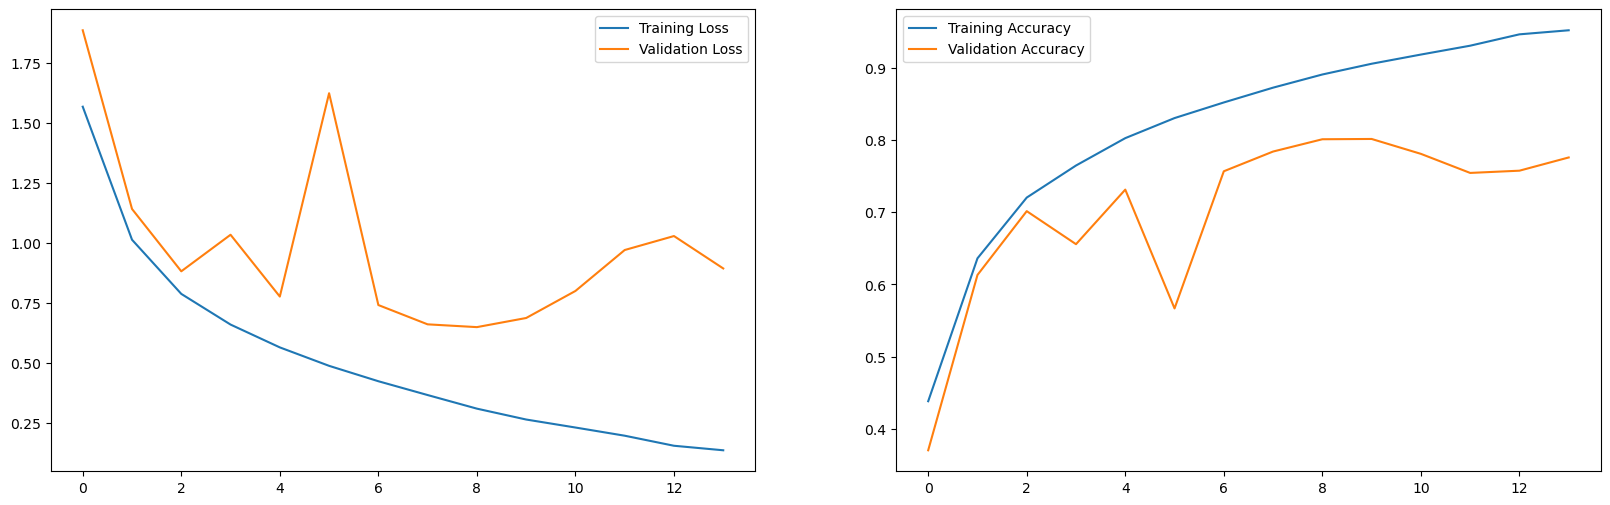

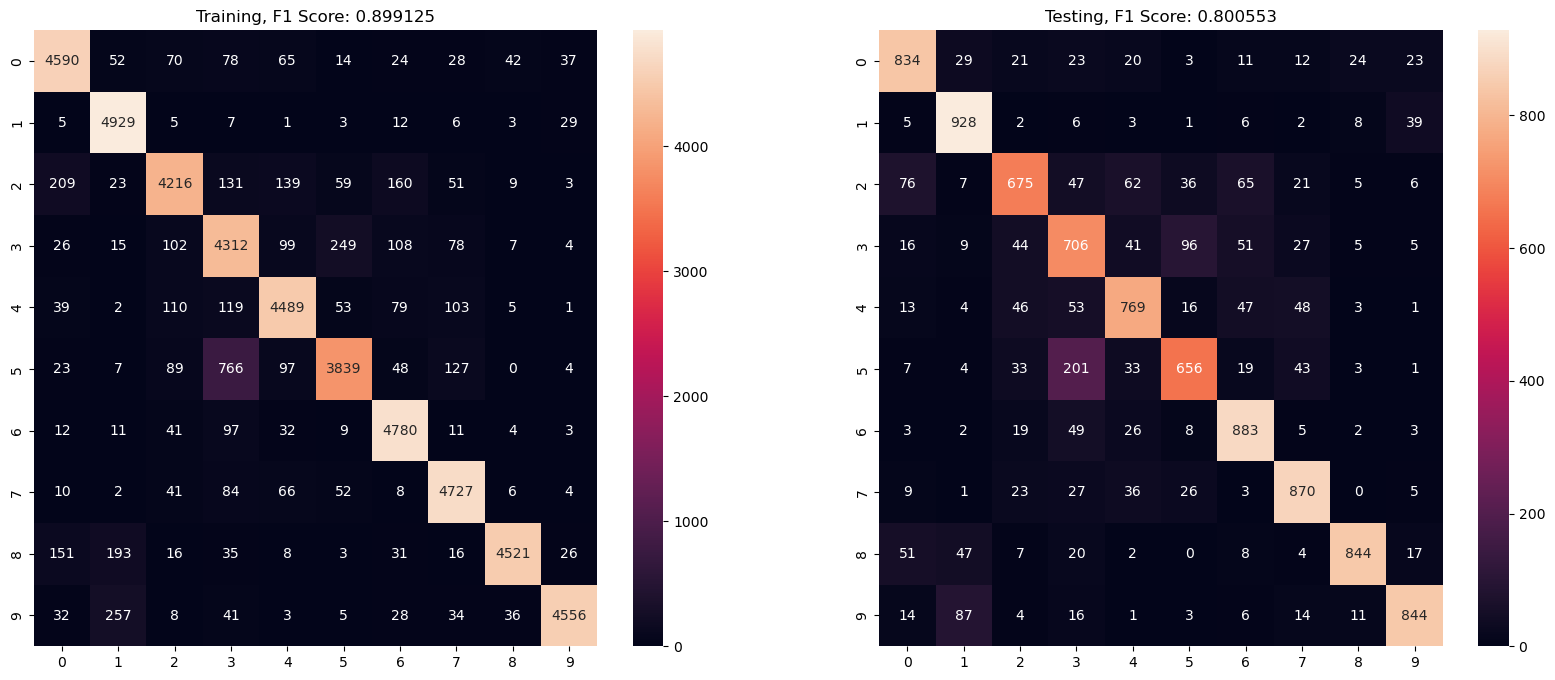

In [9]:
model = train_and_eval(vgg_with_batchnorm, train, train_y, test, test_y)

### Changing Padding Type

In a lot of our networks so far, we've used ``padding='same'`` in our convolution layers. Change that to ``padding='valid'`` here. Note that:
* You may get errors if you just change every layer to ``padding='valid'``
* Consider changing layers one at a time, and look at what happens to the values in the "Output Shape" column of the printed summary for the convolution layers that you change
* Consider what happens as you go deeper and deeper in the network when using ``padding='valid'``

In [10]:
### Network with different type of padding goes here

### Activation Function

Change the activation function being used in the network. Available keras activations can be found [here](https://keras.io/api/layers/activations/).

In [11]:
### Network with changed activations goes here
### Network with batchnorm goes here
### Your VGG-Like and/or AlexNet-Like network goes here
# network input, images are 32 pixels square, and colour; so our size is 32 x 32 x 3
inputs = keras.Input(shape=(32, 32, 3, ), name='img')

# put the rest of the network in here
# first conv group
x = layers.Conv2D(filters=32, kernel_size=(3,3), activation='swish', padding='same')(inputs)
x = layers.Conv2D(filters=32, kernel_size=(3,3), activation=None, padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('swish')(x)
x = layers.MaxPool2D(pool_size=(2,2))(x)

# second conv group
x = layers.Conv2D(filters=64, kernel_size=(3,3), activation='swish', padding='same')(x)
x = layers.Conv2D(filters=64, kernel_size=(3,3), activation=None, padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('swish')(x)
x = layers.MaxPool2D(pool_size=(2,2))(x)

# third conv group
x = layers.Conv2D(filters=128, kernel_size=(3,3), activation='swish', padding='same')(x)
x = layers.Conv2D(filters=128, kernel_size=(3,3), activation='swish', padding='same')(x)
x = layers.Conv2D(filters=128, kernel_size=(3,3), activation=None, padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('swish')(x)
x = layers.MaxPool2D(pool_size=(2,2))(x)

# dense layers
x = layers.Flatten()(x)
x = layers.Dense(512, activation='swish')(x)
x = layers.Dense(512, activation='swish')(x)

# the output, 10 neurons for 10 classes, and a softmax activation
outputs = layers.Dense(10, activation='softmax')(x)

# build the model, and print a summary
vgg_with_swish = keras.Model(inputs=inputs, outputs=outputs, name='vgg_for_cifar10')
vgg_with_swish.summary()

Model: "vgg_for_cifar10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ img (InputLayer)                │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,752,362 (6.68 MB)

 Trainable params: 1,751,914 (6.68 MB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 16s 72ms/step - accuracy: 0.3958 - loss: 1.6914 - val_accuracy: 0.5652 - val_loss: 1.2419
Epoch 2/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 14s 71ms/step - accuracy: 0.6843 - loss: 0.8936 - val_accuracy: 0.7067 - val_loss: 0.8478
Epoch 3/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 14s 71ms/step - accuracy: 0.7699 - loss: 0.6568 - val_accuracy: 0.6805 - val_loss: 0.9921
Epoch 4/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 14s 71ms/step - accuracy: 0.8236 - loss: 0.5022 - val_accuracy: 0.7584 - val_loss: 0.7077
Epoch 5/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 14s 71ms/step - accuracy: 0.8650 - loss: 0.3857 - val_accuracy: 0.7882 - val_loss: 0.6382
Epoch 6/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 14s 71ms/step - accuracy: 0.8924 - loss: 0.2976 - val_accuracy: 0.7685 - val_loss: 0.7933
Epoch 7/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 14s 71ms/step - accuracy: 0.9260 - loss: 0.2076 - val_accuracy: 0.7948 - val_loss: 0.7312
Epoch 8/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 14s 71ms/step - accuracy: 0.9427 - loss: 0.1590 - 

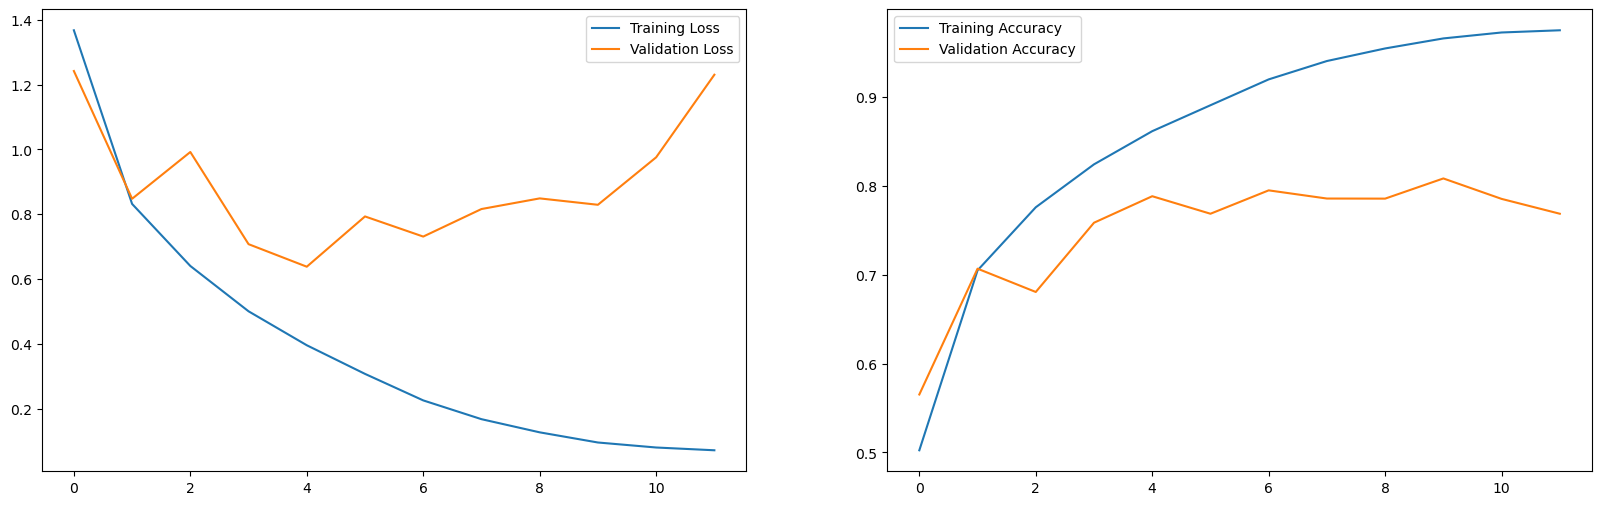

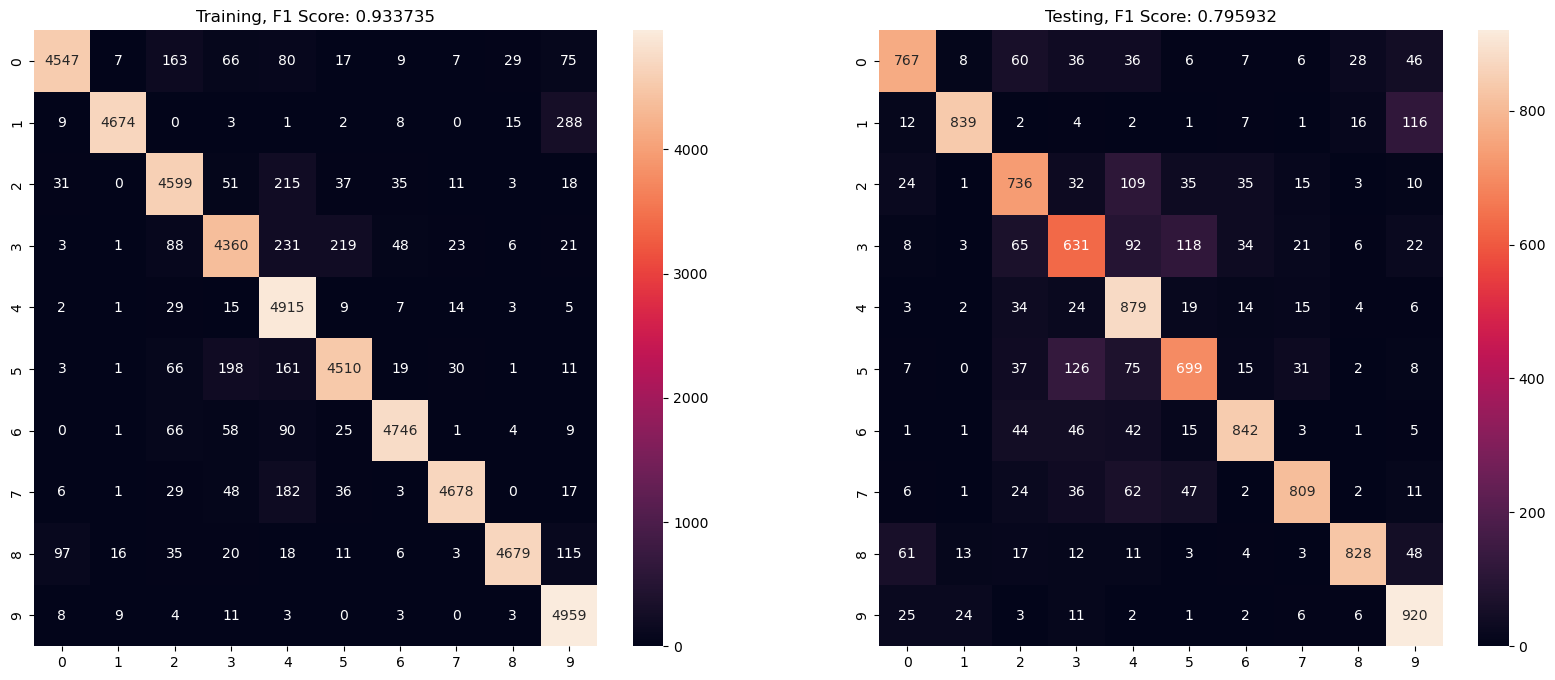

In [12]:
model = train_and_eval(vgg_with_swish, train, train_y, test, test_y)